### TWEET SENTIMENT ANALYSIS

##### IMPORT LIBRARIES

In [25]:
import pandas as pd
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##### LOAD CLASSES AND FUNCTIONS

In [11]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
#    def __init__(self): 
#        ''' 
#        Class constructor or initialization method. 
#        '''
#        # keys and tokens from the Twitter Dev Console 
#        consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
#        consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#        access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#        access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
#  
#        # attempt authentication 
#        try: 
#            # create OAuthHandler object 
#            self.auth = OAuthHandler(consumer_key, consumer_secret) 
#            # set access token and secret 
#            self.auth.set_access_token(access_token, access_token_secret) 
#            # create tweepy API object to fetch tweets 
#            self.api = tweepy.API(self.auth) 
#        except: 
#            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("""(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)""", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets_from_df(self, author, count = 1): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
  
        tweets_df = pd.read_csv('..//data//tweets_kaggle.csv')[['handle','text','original_author']]
        tweets_df.original_author = tweets_df.original_author.apply(str)
            
        tweets_df = tweets_df[tweets_df['original_author']=='nan'][['handle','text']]
        fetched_tweets = tweets_df[tweets_df.handle == author].text

        return fetched_tweets 
    
    def analyze_tweets(self,fetched_tweets):
        
        # empty list to store parsed tweets 
        tweets = [] 
        # parsing tweets one by one 
        for tweet in fetched_tweets: 
            # empty dictionary to store required params of a tweet 
            parsed_tweet = {} 
  
            # saving text of tweet 
            parsed_tweet['text'] = tweet
            # saving sentiment of tweet 
            parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet) 
  
            # appending parsed tweet to tweets list 
            tweets.append(parsed_tweet) 
  
        # return parsed tweets 
        return tweets

    def get_one_tweet(self, fetched_tweets): 
        ''' 
        Main function to fetch custom tweets and parse them. 
        '''
        tweets = []
        try: 
            
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet) 
  
                # appending parsed tweet to tweets list 
                tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
    
    def print_tweet_sentiment(self,tweets):
        
        # picking positive tweets from tweets 
        ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
        # percentage of positive tweets 
        print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
        # picking negative tweets from tweets 
        ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
        # percentage of negative tweets 
        print("Negative tweets percentage: {}%".format(100*len(ntweets)/len(tweets))) 
        # percentage of neutral tweets 
        print("Neutral tweets percentage: {}%".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 
  
        # printing first 5 positive tweets 
        print("\n\nPositive tweets:") 
        for tweet in ptweets[:5]: 
            print(tweet['text']) 
  
        # printing first 5 negative tweets 
        print("\n\nNegative tweets:") 
        for tweet in ntweets[:5]: 
            print(tweet['text']) 
        
        return

### TEST ON HILLARY CLINTON vs DONALD TRUMP DATASET

In [27]:
def main_from_df(author): 
    # calling function to get tweets 
    api = TwitterClient()
    
    tweets_list = api.get_tweets_from_df(author)
    
    tweets_sentiment = api.analyze_tweets(tweets_list) 
    
    api.print_tweet_sentiment(tweets_sentiment)
    
    return tweets_list

In [28]:
if __name__ == "__main__": 
    # calling main function 
    trump_tweets = main_from_df('realDonaldTrump')

Positive tweets percentage: 48.43194309731652 %
Negative tweets percentage: 20.982864532816038%
Neutral tweets percentage: 30.585192369867443%


Positive tweets:
'CNBC, Time magazine online polls say Donald Trump won the first presidential debate' via @WashTimes. #MAGA
https://t.co/PGimqYKPoJ
Great afternoon in Little Havana with Hispanic community leaders. Thank you for your support! #ImWithYou https://t.co/vxWZ2tyJTF
Well, now they're saying that I not only won the NBC Presidential Forum, but last night the big debate. Nice!
Such a great honor. Final debate polls are in - and the MOVEMENT wins!
#AmericaFirst #MAGA #ImWithYou… https://t.co/DV1BKMwHEM
'True blue-collar billionaire Donald Trump shows Hillary Clinton is out of touch' https://t.co/NHO1OicfVm


Negative tweets:
Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc
Hillary Clinton's Campaign Continues To Make False Claims About Foundation Disclosure: 
https:/

In [29]:
if __name__ == "__main__": 
    # calling main function 
    clinton_tweets = main_from_df('HillaryClinton')

Positive tweets percentage: 45.53062000760745 %
Negative tweets percentage: 16.85051350323317%
Neutral tweets percentage: 37.61886648915937%


Positive tweets:
The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG
If we stand together, there's nothing we can't do. 

Make sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy
Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis
This election is too important to sit out. Go to https://t.co/tTgeqxNqYm and make sure you're registered. #NationalVoterRegistrationDay -H
“She gained about 55 pounds in...9 months. She was like an eating machine.” —Trump, a man who wants to be president: https://t.co/1ht91eZCyw


Negative tweets:
Donald Trump lied to the American people at least 58 times during the first presidential debate. (We counted.) https://t.co/h43O6Rws4S
We don’t want to turn agains

### TEST ON CUSTOM TWEETS

In [21]:
def main_from_user(tweets_list): 
    # calling function to get tweets 
    api = TwitterClient()
    
    tweets_sentiment = api.analyze_tweets(tweets_list) 
    
    api.print_tweet_sentiment(tweets_sentiment)
    
    return

In [23]:
if __name__ == "__main__": 
    # calling main function
    my_tweets = ['i hate you all', 'i love you all', 'i don t care']
    
    main_from_user(my_tweets)

Positive tweets percentage: 33.333333333333336 %
Negative tweets percentage: 33.333333333333336%
Neutral tweets percentage: 33.333333333333336%


Positive tweets:
i love you all


Negative tweets:
i hate you all


### WordCloud

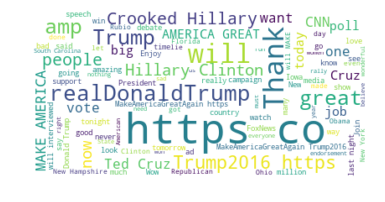

In [31]:
text= trump_tweets.str.cat(sep=' ')
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

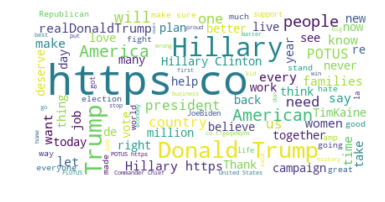

In [32]:
text= clinton_tweets.str.cat(sep=' ')
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()